### This is my solution to the IBM Data Science Course capstone project

In [1]:
#import packages

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
#retrive dataset from the web

!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-04-09 10:23:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2021-04-09 10:23:54 (1.37 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
#read the csv file into dataframe

df=pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
print(df.describe())

print(df.shape)

       Unnamed: 0  Unnamed: 0.1    Principal       terms         age
count  346.000000    346.000000   346.000000  346.000000  346.000000
mean   202.167630    202.167630   943.641618   22.653179   30.939306
std    115.459715    115.459715   109.425530    7.991006    6.039418
min      0.000000      0.000000   300.000000    7.000000   18.000000
25%    107.250000    107.250000   900.000000   15.000000   27.000000
50%    204.500000    204.500000  1000.000000   30.000000   30.000000
75%    298.750000    298.750000  1000.000000   30.000000   35.000000
max    399.000000    399.000000  1000.000000   30.000000   51.000000
(346, 10)


In [5]:
#convert dates to datetime object

df['effective_date']=pd.to_datetime(df['effective_date'])
df['due_date']=pd.to_datetime(df['due_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:


df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

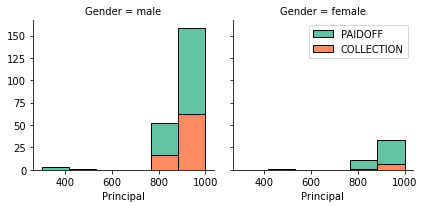

In [7]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 7)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

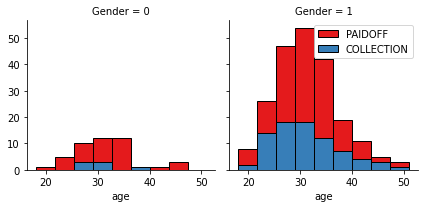

In [22]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [8]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend']= df['dayofweek'].apply(lambda x: 1 if(x>3) else 0)
del df['dayofweek']
df['Gender'].replace(to_replace=['male','female'], value=[1,0],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,1,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,1,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,1,1


In [9]:
df1=pd.get_dummies(df['education'])
dfs=pd.concat([df,df1],axis=1)
del dfs['education']
del dfs['Bechalor']
dfs.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,Gender,weekend,High School or Below,Master or Above,college
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,1,0,1,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,0,0,0,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,1,0,0,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,0,1,0,0,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,1,1,0,0,1


In [10]:
x=dfs.copy()
del x['loan_status'],x['effective_date'],x['due_date'],x['Unnamed: 0'],x['Unnamed: 0.1']

y=dfs['loan_status'].copy()
x.describe()

,Principal,terms,age,Gender,weekend,High School or Below,Master or Above,college
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306,0.849711,0.592486,0.436416,0.005780,0.430636
std,109.425530,7.991006,6.039418,0.357872,0.492084,0.496659,0.075918,0.495882
min,300.000000,7.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,15.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.000000,30.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1000.000000,30.000000,35.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1000.000000,30.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#preprocess(scale) data for algorithms
scaler=preprocessing.StandardScaler().fit(x)
normalized= scaler.transform(x)
normalized

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 0.51578458,  0.92071769,  2.33152555, ...,  1.13639374,
        -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ..., -0.87997669,
        -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.87997669,
        -0.07624929,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.87997669,
        -0.07624929,  1.14984679]])

In [12]:
#train test split

from sklearn.model_selection import train_test_split
Xtest,Xtrain,Ytest,Ytrain= train_test_split(x,y,test_size=0.25,random_state=42)

In [13]:
#logistic regression

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=42)
LR.fit(Xtrain,Ytrain)
LR_predict= LR.predict(Xtest)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
from sklearn import metrics
LR_accuracy= metrics.accuracy_score(Ytest,LR_predict)
print(LR_accuracy)

0.7335907335907336


In [15]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10).fit(Xtrain, Ytrain)
KNN_predict = KNN.predict(Xtest)
KNN_accuracy = metrics.accuracy_score(Ytest, KNN_predict)
KNN_accuracy


0.7027027027027027

In [16]:
from sklearn.svm import SVC
SV= SVC(kernel= 'rbf', random_state=42)
SV.fit(Xtrain, Ytrain)
SV_predict = SV.predict(Xtest)
SV_accuracy= metrics.accuracy_score(Ytest, SV_predict)
print(SV_accuracy)

0.7065637065637066


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
